# 車牌辨識系統：
## 二、建立車牌號碼Harr特徵分類器模型

<img src="https://raw.githubusercontent.com/j82887/Artificial-Intelligence/master/00_Image/19_Implementation%20-%2004_Car_License_Plate.png" align="left" width="200">

## 01. 安裝與調整套件
1. OpenCV Haar 特徵分類器模型訓練 https://github.com/sauhaardac/haar-training
2. OpenCV 官網 https://opencv.org/releases/ 中，下載```opencv-3.4.9-vc14_vc.exe```
3. 安裝```opencv-3.4.9-vc14_vc.exe```，並打開其資料夾，作以下處理：
    
    A. 將```opencv\build\x64\vc15\bin``` 中的三個檔案，複製到```haar-training\tarining```：
        a. opencv_createsamples.exe
        b. opencv_traincascade.exe
        c. opencv_world349.dll
    B. 刪除```haar-training/tarining```中的兩個檔案：
        a. createsamples.exe
        b. traincascade.exe
3. 加入正/負樣本的影像，刪除```Haar-Training-master\training\negative```與```Haar-Training-master\training\positive\rawdata```原檔案

In [77]:
import cv2
print(cv2.__version__)

4.0.0


## 02. 開始使用Haar訓練模型

## 03. 使用Haar特徵分類器偵測車牌

[[ 63 118 151  40]]


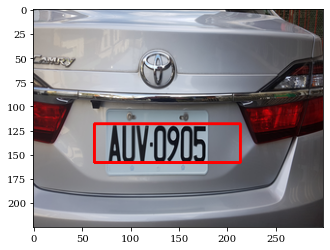

In [153]:
import cv2
import matplotlib.pyplot as plt
img_path = 'carPlate/resize001.bmp'

img = cv2.imread(img_path)
detector = cv2.CascadeClassifier("License_Plate_Haar_cascade.xml")
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=10)

if len(signs) > 0:
    for (sx, sy, sw, sh) in signs:
        cv2.rectangle(img, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
        print(signs)
else:
    print('沒有辨識到車牌!')

''' 
=============== 
OpenCV 讀取影像 
===============
cv2.imshow('Frame', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 04. 車牌號碼擷取

影像維度： (40, 151)


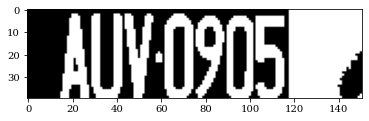

In [154]:
img = cv2.imread(img_path)
crop_img = img[sy:sy+sh, sx:sx+sw]

gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
_, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV) 
print('影像維度：',binary_img.shape)

plt.imshow(binary_img, cmap='gray')
plt.show()

(149, 38, 2, 2)
(58, 19, 3, 5)
(103, 3, 13, 37)
(90, 3, 12, 37)
(76, 3, 13, 37)
(62, 2, 13, 38)
(44, 2, 13, 38)
(29, 2, 14, 38)
(15, 2, 13, 38)
(118, 0, 33, 40)


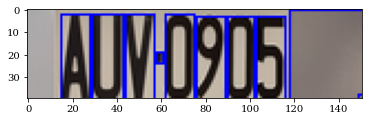

In [155]:
img = cv2.imread(img_path)
crop_img = img[sy:sy+sh, sx:sx+sw]

contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    (x, y, w, h) = cv2.boundingRect(contours[i])
    print((x, y, w, h))
    cv2.rectangle(crop_img, (x, y), (x+w, y+h), (0, 0, 255), 1)

plt.imshow(crop_img)
plt.show()

(103, 3, 13, 37)
(90, 3, 12, 37)
(76, 3, 13, 37)
(62, 2, 13, 38)
(44, 2, 13, 38)
(29, 2, 14, 38)
(15, 2, 13, 38)


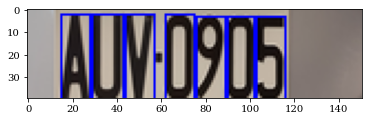

In [156]:
img = cv2.imread(img_path)
crop_img = img[sy:sy+sh, sx:sx+sw]

contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    (x, y, w, h) = cv2.boundingRect(contours[i])
    if w>5 and 39>h>29:
        print((x, y, w, h))
        cv2.rectangle(crop_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
        
plt.imshow(crop_img)
plt.show()